__Mielage Prediction__

__Source :__
This dataset was taken from the StatLib library which is maintained at Camegle Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

__Import Library:__

In [4]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__Import Data :__

In [ ]:
df = pd.read_csv(r'MPG.csv', encoding='unicode_escape')

In [ ]:
df.head()

In [ ]:
df.nunique()

__Data Preprocessing :__

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [40]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.corr()

__Remove Missing Values :__

In [41]:
df = df.dropna()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


__Data Visualization :__

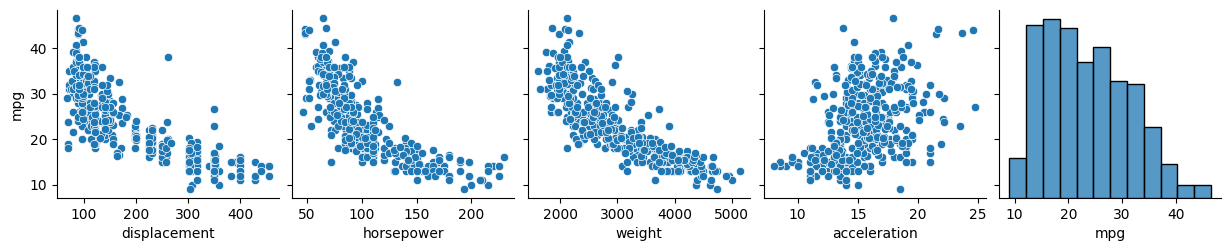

In [43]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg']);

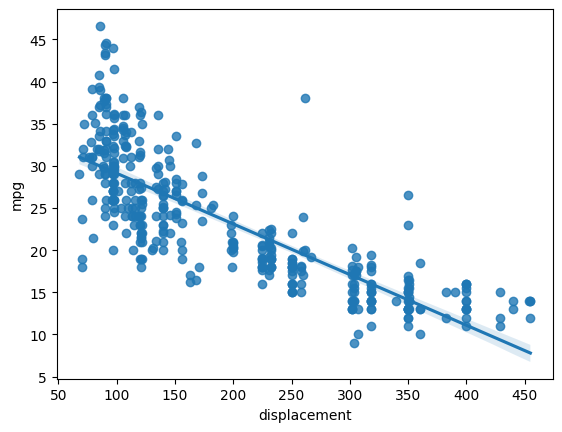

In [44]:
sns.regplot(x='displacement',y='mpg',data=df);

__Define Target variable y and Feature x__

In [45]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [46]:
y=df['mpg']

In [47]:
y.shape

(392,)

In [48]:
x= df[['displacement','horsepower','weight','acceleration']]



In [49]:
x.shape

(392, 4)

In [50]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


__Scalling Data :__



In [51]:
from sklearn.preprocessing import StandardScaler

In [58]:
ss = StandardScaler()

In [59]:
x= ss.fit_transform(x)

In [60]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [61]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


__After Standardization mean is zero and Standard Deviation is One__

__Train Test Split Data__

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=2529)

In [64]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

__Linear Regression Model :__

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr=LinearRegression()

In [67]:
lr.fit(x_train,y_train)

LinearRegression()

In [68]:
lr.intercept_

23.485738559737584

In [69]:
lr.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

__Mileage=23.4-1.05Displacement - 1.68Horsepower - 4.10Weight - 0.11Acceleration+error__

__Predict Test Data__

In [70]:
y_pred= lr.predict(x_test)

In [71]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

__Model Accuracy :__

In [72]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [73]:
mean_absolute_error(y_test,y_pred)

3.3286968643244106

In [74]:
mean_absolute_percentage_error(y_test,y_pred)

0.14713035779536746

In [75]:
r2_score(y_test,y_pred)

0.7031250746717691

__Polynomial Regression :__

In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [84]:
x_train2=poly.fit_transform(x_train)

In [85]:
x_test2= poly.fit_transform(x_test)

In [86]:
lr.fit(x_train2,y_train)

LinearRegression()

In [87]:
lr.intercept_

21.273364500637655

In [88]:
lr.coef_

array([-2.76070596, -5.00559628, -1.36884133, -0.81225214,  1.24596571,
       -0.12475017, -0.90542822,  1.35064048, -0.17337823,  1.41680398])

In [89]:
y_pred_poly=lr.predict(x_test2)

__Model Accuracy__

In [90]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [91]:
mean_absolute_error(y_test,y_pred_poly)

2.7887147720295977

In [92]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.12074018342938687

In [93]:
r2_score(y_test,y_pred_poly)

0.7461731314563802